In [262]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from gensim.models.word2vec import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
import csv
from keras import backend as K
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, Activation, LSTM, Flatten
from keras.layers import GRU
from keras.layers import TimeDistributed
#from keras.layers.RNN import RNN
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
from textblob import TextBlob
from string import punctuation
from collections import Counter
from nltk.corpus import stopwords
#from textstat.textstat import *
stop_words = set(stopwords.words('english'))
from nltk.stem import SnowballStemmer
from string import punctuation
import os
import codecs

import importlib
import sys

importlib.reload(sys)
#sys.setdefaultencoding('utf-8')

from nltk.tokenize import RegexpTokenizer, sent_tokenize
from nltk.stem import WordNetLemmatizer
seed = 7
np.random.seed(seed)

num_tokens = 20000
embed_dim =250
max_rev = 40

In [263]:
# LOAD DATASET (TWEETS)

#user profiling data
user_csv = pd.read_csv("user_data.csv")
followers_csv = pd.read_csv("followers.csv")
follows_csv = pd.read_csv("follows.csv")

userset = user_csv.values
followersset = followers_csv.values
followsset = follows_csv.values

usr = user_csv['tweets'] #userset[:,1].astype(object)
fwr = followers_csv['tweets']  #followersset[:,1].astype(object)
fwg = follows_csv['tweets'] #followsset[:,1].astype(object)

#user profiling evalaution data
userTest = pd.read_csv("testUser.csv")

followingTest = pd.read_csv("testFollowing.csv")

followerTest = pd.read_csv("testFollower.csv")

usrTest = userTest['tweets']
fwgTest = followingTest['tweets']
fwrTest = followerTest['tweets']

#tweet classification dataset

tweetframe = pd.read_csv("balancedTweets.csv", header=None)
#tweetframe = pd.read_csv("tweets.csv", header=None)
tweetset = tweetframe.values
X = tweetset[:,1:4].astype(object)
Y = tweetset[:,0].astype(int)
print (tweetframe)
print (tweetset)
print (X)
print (Y)
'''
dataframe = pd.read_csv("tweet.csv", sep=",", names=["class", "tweet"])
dataset = dataframe.values
X_train = dataset[:,1:4].astype(object)
#X_train = dataframe["tweet"]
y_train = dataset[:,0].astype(int)
print (dataframe)
print (dataset)
print (X_train)
print (X_test)
testframe = pd.read_csv("tweets.csv", sep=",", names=["class", "tweet"])
testset = testframe.values
X_test = testset[:,1:4].astype(object)
#X_test = testframe["tweet"]
y_test = testset[:,0].astype(int)
'''

       0                                                  1
0      0  Only among Muslims can one find someone proudl...
1      0  @_sabanaqvi Only among Muslims can one find so...
2      0  @megha_writes Muslim rapist ?", "truncated": f...
3      0  @peoplepower @ACLU A Muslim holding a placard ...
4      0  RT @Pad_Ban: Bohemians PC. Home to AFA thugs a...
5      0  @rabiasquared They escape the Muslim rapist by...
6      0  When killing innocent Hindus become \"Communal...
7      0  Khilji was a bigot Muslim rapist just like or ...
8      0  Bhansali tricked both sides...\ud83d\ude02\ud8...
9      0  @HindolSengupta In fact even Khilji' deserved ...
10     0  @TRobinsonNewEra MUSLIM! Hes not Asian! Who ar...
11     0  Japanese agitator and racist @tokaiama blasphe...
12     0  RT @LastWave2014: Muslim Rapist RELEASED By Li...
13     0  RT @Pad_Ban: Bohemians PC. Home to AFA thugs a...
14     0  The muslim rapist grabbed a 12 year old girl a...
15     0  RT @Gillian92807531: Sweden gr

'\ndataframe = pd.read_csv("tweet.csv", sep=",", names=["class", "tweet"])\ndataset = dataframe.values\nX_train = dataset[:,1:4].astype(object)\n#X_train = dataframe["tweet"]\ny_train = dataset[:,0].astype(int)\nprint (dataframe)\nprint (dataset)\nprint (X_train)\nprint (X_test)\ntestframe = pd.read_csv("tweets.csv", sep=",", names=["class", "tweet"])\ntestset = testframe.values\nX_test = testset[:,1:4].astype(object)\n#X_test = testframe["tweet"]\ny_test = testset[:,0].astype(int)\n'

In [264]:
print (usr)

0       b"We're still told this poor man killed himsel...
1               b'@GArmy666 do you have a link for that?'
2       b'@armacdonald360 they do deserve a fair punis...
3       b'RT @CrazyWorld463_2: #Protest!! Watch on #Pe...
4       b"@Oldflier49A this story's been doing the rou...
5       b'RT @CountDankulaTV: This is the Twitter equi...
6       b'Foreign aid directly used to preach jihad to...
7       b'Brave kids, their parents deserve jail.\nhtt...
8       b'Family of Telford rape victim told they coul...
9       b'I defy you to name a country in the history ...
10      b"If you laugh at this you're a terrible perso...
11      b"@BreitbartNews safe, obviously I'd rather sa...
12      b'Sadiq Kahn makes London less sage than New Y...
13      b'"Being murdered is part and parcel of living...
14      b'@Politikking @Brianthelion11 win or lose, if...
15      b'@Politikking @Brianthelion11 I hope you do. ...
16      b'Which of these do you wish was just an #Apri...
17      b"Blai

In [265]:
print (fwr)

0       b'RT @Isobella35: Many FBPE cult on here tonda...
1       b'RT @MaajidNawaz: A 3 year-old was subjected ...
2       b"RT @latimeralder: Re: 'Regulatory Alignment'...
3       b'RT @LeaveMnsLeave: Nigel Farage has said he ...
4       b'RT @MarkACollett: Over 1800 cars have been t...
5       b'RT @Northman061: @redmac10710 @StippledW Whe...
6       b'RT @DVATW: Lifting the lid on #FinsburyParkM...
7       b'RT @BeyondSimian: The government needs to ch...
8       b'RT @OrwellNGoode: "those darn white people a...
9       b'RT @Talkmaster: Islam is a scourge. @nathanl...
10      b'RT @BrexitTory_: John McDonnell admits that ...
11      b'RT @6GorillionNotNf: There are far worse thi...
12      b'RT @patcondell: Some good news for a change....
13      b'RT @SoulWarrior1994: And Muslim men suggests...
14                 b'@Sister_Alia Islam IS the far right'
15      b'RT @BlizzardJoanna: @DVATW Radical Muslims c...
16      b'RT @richardahilluk: Police, Govnt, BBC narra...
17      b"RT @

In [266]:
print (fwg)

0       b"@theresa_may U are a complete bitch an a sel...
1       b'RT @NadineDorries: So, it\xe2\x80\x99s true....
2       b"@theresa_may @10DowningStreet Why do u never...
3       b"@Anna_Soubry @theresa_may @sarahwollaston @B...
4       b'RT @RealitySmash: The left want this video o...
5       b'@theresa_may Free Tommy Robinson now u an ur...
6       b'RT @AMike4761: Muslim refugees to the Britis...
7                  b'@Gareth91882603 Absolutely shocking'
8       b"RT @Gareth91882603: CPS in Telford tell Fath...
9                          b'@2tweetaboutit Fucking scum'
10      b'RT @2tweetaboutit: "The enemy within: Muslim...
11      b'RT @kazmc39: Have spoken with this butchers ...
12      b'@TRobinsonOnline What a fucking disgrace tha...
13      b'@WestmonsterUK It just proves the British pe...
14      b'RT @Graham_British: \xf0\x9f\x87\xac\xf0\x9f...
15      b'@Jacob_Rees_Mogg People are at the end of th...
16      b'RT @OrwellNGoode: Remember how "It\'s Okay T...
17      b'@tim

In [267]:
def split_into_tokens(tweet):
    
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|''[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweet = re.sub(giant_url_regex, '', tweet)
    snon1 = '&#[0-9]*;'
    tweet = re.sub(snon1, ' ', tweet)
    snon2 = '&#[0-9]*'
    tweet = re.sub(snon2, ' ', tweet)
    tweet = tweet.lower()  
    tweet = tweet.replace("/", "")
    tweet = tweet.replace("\\", "")
    tweet = tweet.replace("//", "")
    tweet = tweet.replace("u2026", "")
    tweet = tweet.replace("htt", "")
    tweet = tweet.replace("http", "")
    tweet = tweet.replace("u2019", "")
    tweet = tweet.replace("u2014", "")
    tweet = tweet.replace("ud83d", "")
    tweet = tweet.replace("ude0e", "")
    #tweet = tweet.replace("rt", "")
    tweet = tweet.replace("text", "")
    tweet = tweet.replace("truncated", "")
    tweet = tweet.replace("false", "")
    tweet = tweet.replace("entity", "")
    tweet = tweet.replace("hashtags", "")
    tweet = tweet.replace("symbol", "")
    tokens = tweet.split()
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 2]
    return tokens
    #words = TextBlob(tweet).words
    #return [word.lemma for word in words if not word in stop_words]
    #return [word.lemma for word in words]
    #return [word.lemma for word in words if not word in stop_words]
    #return [ps.stem(word) for word in words if not word in stop_words]
    #return [lemma.lemmatize(word) for word in words if not word in stop_words]
    #return ngrams(words, 2)
    #return bigrams(words)

In [268]:

words = []
for i in X:
    for z in i:
        d = split_into_tokens(z)
        words.append(d)
        print (d)

print (words)
'''
words = []
for i in X_train:
    for z in i:
        d = split_into_tokens(z)
        words.append(d)
        print (d)

print (words)
'''

['among', 'muslims', 'one', 'find', 'someone', 'proudly', 'cooing', 'misogynist']
['among', 'muslims', 'one', 'find', 'someone', 'proudly', 'cooing', 'misogynist']
['muslim', 'rapist']
['muslim', 'holding', 'placard', 'illegals', 'shud', 'given', 'priority', 'dang']
['bohemians', 'home', 'afa', 'thugs', 'african', 'muslim', 'player', 'raped', 'year', 'old', 'plays']
['escape', 'muslim', 'rapist', 'committing', 'jauhar', 'recently', 'yezidi', 'women', 'mag']
['killing', 'innocent', 'hindus', 'become', 'muslim', 'rapist', 'becomes', 'days', 'numbered']
['khilji', 'bigot', 'muslim', 'rapist', 'like', 'even', 'worse', 'aurangzeb', 'muslim']
['bhansali', 'tricked', 'showing', 'muslim', 'ruler']
['fact', 'even', 'deserved', 'drug', 'addict', 'muslim', 'jihadi', 'first']
['hes', 'racists', 'calling', 'every', 'muslim', 'rapist', 'terrorist', 'islam']
['japanese', 'agitator', 'racist', 'blasphemes', 'muhammad', 'rapist', 'many', 'muslim']
['muslim', 'rapist', 'released', 'liberal', 'happens', 

['sharia', 'cars', 'burnings', 'become', 'jihadi', 'new', 'years', 'tradition']
['american', 'muslims', 'palestine', 'group', 'openly', 'advocates']
['blackoutnnkeith', 'jihadi', 'congressman', 'openly', 'supports', 'cair', 'aka']
['showing', 'cartoons']
['california', 'enforcing', 'nncalifornia', 'unconstitutionally', 'prosecuting']
['banned', 'twitter', 'account', 'reporting', 'type', 'jihadi', 'new']
['liberal', 'media', 'nnwhile', 'busy', 'pretending', 'muslims', 'victims']
['burn', 'pope', 'lectures', 'catholics', 'respecting', 'jihadists', 'nnif', 'open', 'borders']
['deceiving', 'american', 'muslims', 'partner', 'getty', 'images']
['invited', 'jihadists', 'air', 'spread', 'terrorist', 'teamed', 'muslim', 'public']
['australiannaus', 'chief', 'said', 'western', 'women', 'need', 'muslims']
['helps', 'jihadists', 'deceive', 'jihadist', 'partnered', 'getty', 'manipulate']
['happy', 'new', 'year', 'californiannpolice', 'working', 'homeland']
['enrichment', 'germanynnsharia', 'germany

['sad', 'hear', 'countries', 'described', 'whether', 'homes', 'built', 'marble']
['medical', 'bills', 'ovarian', 'claim', 'illegal', 'free']
['great', 'response', 'like', 'people', 'desperately', 'need', 'jobs', 'destroy']
['even', 'donate', 'entitled', 'fuck']
['commie', 'scum']
['hard', 'earned', 'wrong', 'always']
['hispanic', 'black', 'person', 'white', 'person', 'white']
['combat', 'idea', 'compared', 'decided', 'act', 'like', 'literal', 'monkeys', 'trash']
['imagine', 'black', 'person', 'working', 'convincing', 'boss', 'give', 'extra', 'hours', 'pay', 'books']
['trashed', 'fighters', 'yalls', 'weak', 'mentality', 'makes', 'believe']
['wanna', 'ask', 'black', 'men', 'prison', 'lmao']
[]
['trailer', 'cow', 'slaughter']
['fakenews']
['radio', 'show', 'ris', 'news', 'network']
['believe']
['see']
['following', 'media', 'outlets', 'promote']
['somali', 'multiple', 'cannot', 'deported', 'gullestrup']
['body', 'james', 'wickstrom']
['life', 'girls', 'say', 'child', 'marriage', 'africa']

['arabic', 'noses']
['criminal', 'makes', 'appear', 'racist', 'nanybody', 'join']
['another', 'justin', 'precious', 'arabian', 'rock', 'smoochers', 'opens', 'fire', 'restaurant']
['fascist', 'organisation', 'antifa', 'respect', 'american', 'see', 'cops', 'need']
['left', 'want', 'post', 'removed', 'white', 'people', 'racist', 'please', 'retweet']
['awkward', 'moment', 'dawns', 'nelson', 'mandela', 'could', 'dreamt', 'loved', 'tommy']
['weird', 'many', 'dickheads', 'reply', 'job', 'post', 'something']
[]
['feel', 'like', 'shot', 'missed', 'shit']
['sat', 'corner', 'nightclub', 'enjoying', 'moment', 'inevitable', 'sexual', 'abuse']
['time', 'retweet', 'head']
['muslim', 'countries', 'self', 'define', 'one', 'tiny', 'jewish', 'bloody']
['picture', 'typical', 'lefty', 'slave', 'loves']
['saw', 'david', 'trending', 'shat', 'ever']
['bumping', 'head', 'wall', 'laugh', 'mental', 'illness']
['destroyed', 'whole', 'load', 'lefty', 'trolls', 'one', 'hand', 'whilst', 'eating', 'delicious', 'bacon

['usa', 'government', 'shut', 'wetbacks', 'men', 'women', 'military', 'left']
['usa', 'government', 'shut', 'wetbacks', 'men', 'women', 'military', 'left', 'democrats']
['usa', 'government', 'shut', 'wetbacks', 'men', 'women', 'military', 'left', 'unattended']
['usa', 'government', 'shut', 'wetbacks', 'men', 'women', 'military', 'left', 'unatten']
['usa', 'government', 'shut', 'wetbacks', 'men', 'women', 'military', 'left', 'democrats']
['congress', 'dont', 'wanna', 'pay', 'dues', 'protect']
['promise', 'concentration', 'camps', 'gas', 'chambers', 'hajjis']
['lol', 'antes', 'que', 'beaners', 'wetbacks']
['lol', 'antes', 'que', 'beaners', 'wetbacks']
['need', 'kick', 'wetbacks', 'sick']
['kept', 'saying', 'voted', 'fucking']
['made', 'fucking', 'cry', 'call', 'wetbacks', 'lmao', 'fucking', 'hate', 'white', 'americans']
['nso', 'want', 'lower', 'property', 'stop', 'taking', 'care', 'damn']
['used', 'called', 'think', 'appropriate', 'delusional']
['ice', 'please', 'come', 'northern', 'cal

['redskins', 'watch', 'back']
['nonwhites', 'spend', 'garlic']
['polacks', 'need']
['waspies', 'another']
['work', 'obama']
['negroes', 'send', 'gay']
['wetbacks', 'grow']
['dagos', 'put', 'john']
['haoles', 'tangerine']
['natives', 'meet', 'stupid']
['indians', 'use', 'unpopular']
['injuns', 'think', 'bush']
['orientals', 'build']
['crackers', 'white', 'lives']
['palefaces', 'ever', 'play']
['crackers', 'call']
['win', 'lots']
['nonwhites', 'teach', 'catholic', 'sex']
['jerries', 'appear', 'dead', 'paul']
['pakehas', 'tell', 'hillary']
['orientals', 'open']
['makwerekweres', 'appear']
['mulattos', 'become', 'saddam']
['primitives', 'open', 'unpopular']
['savages', 'spend']
['natives', 'seem']
['savages', 'keep', 'black', 'lives']
['primitives', 'keep']
['dagos', 'consider', 'alex']
['niggers', 'win', 'million']
['niggers']
['gooks', 'vaping']
['gringos', 'serve']
['krauts', 'seem', 'police']
['nonwhites', 'want']
['gooks', 'serve']
['natives']
['red', 'indians', 'seem', 'hillary']
['f

['quran', 'teach', 'non', 'muslims', 'cannot', 'kill']
['evil', 'prevails', 'good', 'people', 'must', 'expose', 'isla']
['wonder', 'evil', 'muslims', 'sponsoring', 'fulani', 'herdsmen', 'terrorist', 'killing']
['hindu', 'refugee', 'camp', 'leader', 'talks', 'evil', 'bengali', 'muslims']
['hero', 'linda', 'sarsour', 'says', 'people', 'right', 'tell', 'muslims', 'kill', 'evil']
['crusades', 'called', 'counter', 'muslim', 'muslims', 'attacking', 'enslave', 'christians', 'euro']
['would', 'train', 'wolf', 'hunt']
['communists', 'mexicans', 'set', 'reichstag', 'congress', 'come', 'together', 'great', 'germ']
['fuck', 'mexicans', 'left', 'mexico', 'trash', 'hang', 'compulsive']
['wont', 'stop', 'demanding', 'amnesty', 'mexico', 'literally', 'mexicans', 'living']
['mexicans', 'muslims', 'white', 'nazis', 'destroyed', 'years', 'clan', 'yrs']
['mexicans', 'burning', 'muslims', 'chopping', 'see', 'clansmen', 'doi']
['soon', 'mexicans', 'start', 'flying', 'commercial', 'aircraft', 'new', 'york']


['yet', 'rely', 'believe', 'lies', 'pushed', 'corrupt', 'media']
['effect', 'justin']
['political', 'correctness', 'used', 'shame', 'silence', 'fight', 'defeat']
['saudi', 'manipulating', 'oil', 'market', 'method', 'control', 'world', 'around']
['isis', 'feel', 'way']
['allow', 'political', 'correctness', 'erase', 'look', 'acknowledge', 'learn']
['listed', 'terrorist', 'nnthis', 'must']
['afghan', 'whose', 'deportation', 'blocked', 'crying', 'swedish', 'whipped', 'wife', 'daughters']
['fully', 'knowing', 'original', 'people', 'countries']
['young', 'girl', 'suffer', 'rest', 'life', 'low', 'life', 'americans', 'running', 'low']
['paris', 'last', 'afghan', 'germany', 'previously', 'afghans', 'anybody', 'see']
['banned', 'hate']
['man', 'wielding', 'knife', 'stabbed', 'injured', 'seven', 'people', 'paris', 'sunday', 'nnfrench', 'authorities', 'believe']
['would', 'fared', 'pretended', 'moderate', 'insisted', 'nazism', 'enriched']
['much', 'blood', 'spilled', 'due', 'extremist', 'policies'

['shows', 'power', 'media', 'people', 'get', 'caught', 'well', 'crafted']
['want', 'apply', 'visa', 'prove']
['reading', 'news', 'april', 'fools']
['nso', 'dont', 'like', 'dont', 'dont', 'like', 'know', 'going']
['think', 'tommy', 'racist', 'quote', 'anything', 'racist']
['dont', 'think', 'phenomenon', 'find', 'ask', 'average']
['real', 'independence', 'would']
['solution', 'glaring', 'far', 'harsher', 'murderers', 'seek', 'destroy']
['man', 'living', 'parallel']
[]
['something', 'without', 'permission', 'owner', 'paying']
['burnham', 'defends', 'fire', 'fighters', 'turning', 'two', 'hours', 'late', 'manchester']
['moment', 'knew', 'leave', 'already', 'late', 'stop']
['happened', 'deserving']
['subjected', 'glad', 'ofsted']
['sent', 'let', 'know']
[]
['everyone', 'really', 'free']
['producer', 'podcast', 'launching', 'next', 'love']
['read', 'story', 'good', 'standing', 'beliefs']
['george', 'soros', 'sponsor']
[]
['stale', 'chocolate', 'fault', 'brexit']
[]
[]
['calls', 'sky', 'left']

'\nwords = []\nfor i in X_train:\n    for z in i:\n        d = split_into_tokens(z)\n        words.append(d)\n        print (d)\n\nprint (words)\n'

In [269]:
def clean_tweets(tweet):
    
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|''[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweet = re.sub(giant_url_regex, '', tweet)
    snon1 = '&#[0-9]*;'
    tweet = re.sub(snon1, ' ', tweet)
    snon2 = '&#[0-9]*'
    tweet = re.sub(snon2, ' ', tweet)
    tweet = tweet.lower()  
    tweet = tweet.replace("/", "")
    tweet = tweet.replace("\\", "")
    tweet = tweet.replace("//", "")
    tweet = tweet.replace("u2026", "")
    tweet = tweet.replace("u2019", "")
    tweet = tweet.replace("u2014", "")
    tweet = tweet.replace("ud83d", "")
    tweet = tweet.replace("ude0e", "")
    tweet = tweet.replace('RT @', ' ')
    tweet = tweet.replace('@', ' ')
    tweet = tweet.replace(':', ' ')
    tweet = tweet.replace('entities', ' ')
    tweet = tweet.replace('[', ' ')
    tweet = tweet.replace(']', ' ')
    tweet = tweet.replace('}', ' ')
    tweet = tweet.replace('{', ' ')
    tweet = tweet.replace('!', ' ')
    tweet = tweet.replace('.', ' ')
    tweet = tweet.replace(',', ' ')
    tweet = tweet.replace(';', ' ')
    tweet = tweet.replace('"', ' ')
    tweet = tweet.replace("'", " ")
    tweet = tweet.replace('_', ' ')
    tweet = tweet.replace('-', ' ')
    tweet = tweet.replace('*', ' ')
    tweet = tweet.replace('%', ' ')
    tweet = tweet.replace('&amp', ' ')
    tweet = tweet.replace('#', ' ')
    tweet = tweet.replace('?', ' ')
    tweet = tweet.replace('(', ' ')
    tweet = tweet.replace(')', ' ')
    #tweet = tweet.replace("rt ", " ")
    #tweet = tweet.replace("text", "")
    #tweet = tweet.replace("truncated", "")
    #tweet = tweet.replace("false", "")
    #tweet = tweet.replace("entity", "")
    #tweet = tweet.replace("hashtags", "")
    #tweet = tweet.replace("symbol", "")
    tweet = tweet.replace("0", "")
    tweet = tweet.replace("1", "")
    tweet = tweet.replace("2", "")
    tweet = tweet.replace("3", "")
    tweet = tweet.replace("4", "")
    tweet = tweet.replace("5", "")
    tweet = tweet.replace("6", "")
    tweet = tweet.replace("7", "")
    tweet = tweet.replace("8", "")
    tweet = tweet.replace("9", "")
    tweet = tweet.replace('\'', '')
    #words = TextBlob(tweet).words
    return tweet
    #return [word.lemma for word in words if not word in stop_words]
    #return [word.lemma for word in words]
    #return [word.lemma for word in words if not word in stop_words]
    #return [ps.stem(word) for word in words if not word in stop_words]
    #return [lemma.lemmatize(word) for word in words if not word in stop_words]
    #return ngrams(words, 3)
    #return bigrams(words)

In [270]:

tweets = []
for j in X:
    for t in j:
        l = clean_tweets(t) #x = tknzr.tokenize(i)
        tweets.append(l)
        #print (l)
        
user = []
followers = []
following = []
utest = []
fgtest = []
frtest = []

for u in usr:
    s = clean_tweets(u)
    user.append(s)
        
for o in fwr:
    r = clean_tweets(o)
    followers.append(r)
        
for n in fwg:
    g = clean_tweets(n)
    following.append(g)
    
for q in usrTest:
    d = clean_tweets(n)
    utest.append(d)
    
for p in fwgTest:
    a = clean_tweets(p)
    fgtest.append(a)
    
for z in fwrTest:
    v = clean_tweets(z)
    frtest.append(v)
'''
tweets = []
for j in X_train:
    for t in j:
        l = clean_tweets(t) #x = tknzr.tokenize(i)
        tweets.append(l)
        print (l)
test = []
for v in X_test:
    for r in v:
        p = clean_tweets(t) #x = tknzr.tokenize(i)
        test.append(p)
        print (p)
'''

'\ntweets = []\nfor j in X_train:\n    for t in j:\n        l = clean_tweets(t) #x = tknzr.tokenize(i)\n        tweets.append(l)\n        print (l)\ntest = []\nfor v in X_test:\n    for r in v:\n        p = clean_tweets(t) #x = tknzr.tokenize(i)\n        test.append(p)\n        print (p)\n'

In [271]:

tokenizer = Tokenizer(num_words = num_tokens)
tokenizer.fit_on_texts(tweets)
sentences = tokenizer.texts_to_sequences(tweets)
word_idx = tokenizer.word_index
#print (word_idx)
#print ("sentences: ")
#print (sentences)
vocab_size = len(tokenizer.word_index) + 1
print ("vocab size: ", vocab_size)



vocab size:  21953


In [272]:
print (len(word_idx))

21952


In [273]:
tokenizer = Tokenizer(num_words = num_tokens)
tokenizer.fit_on_texts(user)
usr_tweets = tokenizer.texts_to_sequences(user)
word_idx = tokenizer.word_index
#print (word_idx)
#print ("sentences: ")
#print (usr_tweets)
user_vocab_size = len(tokenizer.word_index) + 1
print ("vocab size: ", user_vocab_size)


vocab size:  20844


In [274]:
tokenizer = Tokenizer(num_words = num_tokens)
tokenizer.fit_on_texts(followers)
fwr_tweets = tokenizer.texts_to_sequences(followers)
word_idx = tokenizer.word_index
#print (word_idx)
#print ("sentences: ")
#print (fwr_tweets)
fwr_vocab_size = len(tokenizer.word_index) + 1
print ("vocab size: ", fwr_vocab_size)


vocab size:  9467


In [275]:
tokenizer = Tokenizer(num_words = num_tokens)
tokenizer.fit_on_texts(following)
fwg_tweets = tokenizer.texts_to_sequences(following)
word_idx = tokenizer.word_index
#print (word_idx)
#print ("sentences: ")
#print (fwg_tweets)
fwg_vocab_size = len(tokenizer.word_index) + 1
print ("vocab size: ", fwg_vocab_size)


vocab size:  11108


In [276]:
tokenizer = Tokenizer(num_words = num_tokens)
tokenizer.fit_on_texts(utest)
usr_test = tokenizer.texts_to_sequences(utest)
word_idx = tokenizer.word_index
#print (word_idx)
#print ("sentences: ")
#print (usr_tweets)
utest_vocab_size = len(tokenizer.word_index) + 1
print ("vocab size: ", utest_vocab_size)


vocab size:  18


In [277]:
tokenizer = Tokenizer(num_words = num_tokens)
tokenizer.fit_on_texts(fgtest)
fwg_test = tokenizer.texts_to_sequences(fgtest)
word_idx = tokenizer.word_index
#print (word_idx)
#print ("sentences: ")
#print (usr_tweets)
fgtest_vocab_size = len(tokenizer.word_index) + 1
print ("vocab size: ", fgtest_vocab_size)


vocab size:  28383


In [278]:
tokenizer = Tokenizer(num_words = num_tokens)
tokenizer.fit_on_texts(frtest)
fwr_test = tokenizer.texts_to_sequences(frtest)
word_idx = tokenizer.word_index
#print (word_idx)
#print ("sentences: ")
#print (usr_tweets)
frtest_vocab_size = len(tokenizer.word_index) + 1
print ("vocab size: ", frtest_vocab_size)


vocab size:  18921


In [279]:

messages = pad_sequences(sentences, maxlen = len(max(sentences, key = len)), padding = 'post') #maxlen = len(max(sentences, key = len))
#messages = pad_sequences(sentences, maxlen = max_rev, padding = 'post' )
maxl = len(sentences)
print (maxl)

user_tweets = pad_sequences(usr_tweets, maxlen = len(max(sentences, key = len)), padding = 'post') #maxlen = len(max(sentences, key = len))
#user_tweets = pad_sequences(usr_tweets, maxlen = max_rev)
maxlu = len(usr_tweets)
print ("user length: ", maxlu)

followers_tweets = pad_sequences(fwr_tweets, maxlen = len(max(sentences, key = len)), padding = 'post') #maxlen = len(max(sentences, key = len))
#followers_tweets = pad_sequences(fwr_tweets, maxlen = max_rev)
maxlr = len(fwr_tweets)
print ("follower length", maxlr)

following_tweets = pad_sequences(fwg_tweets, maxlen = len(max(sentences, key = len)), padding = 'post') #maxlen = len(max(sentences, key = len))
#following_tweets = pad_sequences(fwg_tweets, maxlen = max_rev)
maxlg = len(fwg_tweets)
print ("following length", maxlg)

user_Test = pad_sequences(usr_test, maxlen = len(max(sentences, key = len)), padding = 'post') #maxlen = len(max(sentences, key = len))
#user_tweets = pad_sequences(usr_tweets, maxlen = max_rev)
maxluT = len(usr_test)
print ("user length: ", maxluT)

following_Test = pad_sequences(fwg_test, maxlen = len(max(sentences, key = len)), padding = 'post') #maxlen = len(max(sentences, key = len))
#user_tweets = pad_sequences(usr_tweets, maxlen = max_rev)
maxlgT = len(fwg_test)
print ("user length: ", maxlgT)

follower_Test = pad_sequences(fwr_test, maxlen = len(max(sentences, key = len)), padding = 'post') #maxlen = len(max(sentences, key = len))
#user_tweets = pad_sequences(usr_tweets, maxlen = max_rev)
maxlrT = len(fwr_test)
print ("user length: ", maxlrT)



'''
X_train = pad_sequences(sentences, maxlen = len(max(sentences, key = len)), padding = 'post') #maxlen = len(max(sentences, key = len))
maxl = len(sentences)
print (maxl)
print (X_train.shape)
X_test = pad_sequences(test_sent, maxlen = len(max(sentences, key = len)), padding = 'post') #maxlen = len(max(sentences, key = len))
maxl = len(sentences)
print (maxl)
print (X_test.shape)
'''

11805
user length:  9432
follower length 2886
following length 4264
user length:  9106
user length:  20299
user length:  8127


"\nX_train = pad_sequences(sentences, maxlen = len(max(sentences, key = len)), padding = 'post') #maxlen = len(max(sentences, key = len))\nmaxl = len(sentences)\nprint (maxl)\nprint (X_train.shape)\nX_test = pad_sequences(test_sent, maxlen = len(max(sentences, key = len)), padding = 'post') #maxlen = len(max(sentences, key = len))\nmaxl = len(sentences)\nprint (maxl)\nprint (X_test.shape)\n"

In [280]:
labels = to_categorical(Y)
X_train, X_test, y_train, y_test = train_test_split(messages, labels, test_size=0.10, random_state=seed, shuffle=True)

user_test = user_tweets
followers_test = followers_tweets
following_test = following_tweets

user_eval = user_Test
following_eval = following_Test
follower_eval = follower_Test

#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)
print (labels)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [281]:
print ("user_test shape: ", user_test.shape)
print ("followers_test shape: ", followers_test.shape)
print ("following_test", following_test.shape)

user_test shape:  (9432, 36)
followers_test shape:  (2886, 36)
following_test (4264, 36)


In [282]:
# Create new Gensim Word2Vec model

#w2v_model = Word2Vec(words, size=embed_dim, min_count=5, window=5) #, size=500, min_count=1, window=10
#w2v_model.init_sims(replace=True)
#w2v_model.wv.save_word2vec_format('myLSTMTweets.word2vec.bin', binary=False)


In [283]:
# Load an existing Word2Vec model
#w2v_model.seek(0)
new_model = KeyedVectors.load_word2vec_format('myLSTMTweets.word2vec.bin', binary=False)
print('Found %s word vectors of word2vec' % len(new_model.vocab))

Found 28412 word vectors of word2vec


In [284]:
embeddings_index = {}
f = open('myLSTMTweets.word2vec.bin')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 28413 word vectors.


In [285]:
embedding_matrix = np.zeros((vocab_size, embed_dim))
for word, i in word_idx.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        #word in new_model.vocab:
         embedding_matrix[i] = embedding_vector
            
print("length of word idx: ", len(word_idx))
print("embedding matrix shape: ", embedding_matrix.shape)

#print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

length of word idx:  18920
embedding matrix shape:  (21953, 250)


In [286]:
print ("shape of X: ", X_train.shape)
#y_train = np.reshape(y_train, (5602, 1))
print ("shape of Y: ", y_train.shape)

shape of X:  (10624, 36)
shape of Y:  (10624, 5)


In [287]:
max_len = X_train.shape[1]
#max_len = 50
print (max_len)

36


In [288]:
#u_list = []
#u_list.append(user_csv['user'])
#print (u_list)
u_list = []
for i in user_csv['user']:
    u_list.append(i)
    #print (u_list)
    
uT_list = []
for n in userTest['user']:
    uT_list.append(n)

    

In [289]:
u_tweets = []
for t in user_csv['tweets']:
    u_tweets.append(t)
    
uT_tweets = []
for o in userTest['tweets']:
    uT_tweets.append(o)

In [290]:
fwr_list = []
for e in followers_csv['user']:
    fwr_list.append(e)
    

In [291]:
fg_list = []
for u in followingTest['user']:
    fg_list.append(u)

In [292]:
fwr_tweets = []
for q in followers_csv['tweets']:
    fwr_tweets.append(q)
    
fg_tweets = []
for g in followingTest['tweets']:
    fg_tweets.append(g)

In [293]:
fwr_follows = []
for p in followers_csv['follows']:
    fwr_follows.append(p)
    
fg_follows = []
for k in followingTest['follows']:
    fg_follows.append(k)

In [294]:
fwg_list = []
for j in follows_csv['user']:
    fwg_list.append(j)
    
fr_list = []
for h in followerTest['user']:
    fr_list.append(h)

In [295]:
fwg_tweets = []
for g in follows_csv['tweets']:
    fwg_tweets.append(g)
    
fr_tweets = []
for r in followerTest['tweets']:
    fr_tweets.append(r)

In [296]:
fwg_follows = []
for w in follows_csv['follows']:
    fwg_follows.append(w)
    
fr_follows = []
for y in followerTest['follows']:
    fr_follows.append(y)

In [297]:
def precision(y_true, y_pred):
    """Precision metric.
    Only computes a batch-wise average of precision.
    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    """Recall metric.
    Only computes a batch-wise average of recall.
    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def fbeta_score(y_true, y_pred, beta=1):
    """Computes the F score.
    The F score is the weighted harmonic mean of precision and recall.
    Here it is only computed as a batch-wise average, not globally.
    This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.
    With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    """
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')

    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score

def fmeasure(y_true, y_pred):
    """Computes the f-measure, the harmonic mean of precision and recall.
    Here it is only computed as a batch-wise average, not globally.
    """
    return fbeta_score(y_true, y_pred, beta=1)

def f1_score(y_true, y_pred):

    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0

    # How many selected items are relevant?
    precision = c1 / c2

    # How many relevant items are selected?
    recall = c1 / c3

    # Calculate f1_score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

def recall(y_true, y_pred):

    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0

    recall = c1 / c3

    return recall




In [298]:
model = Sequential()
model.add(Embedding(vocab_size, embed_dim,input_length = max_len))
#model.add(Embedding(vocab_size, embed_dim, weights=[embedding_matrix], input_length = sequence_length, trainable=False))
#model.add(Embedding(vocab_size, embed_dim, weights=[embedding_matrix], input_length = max_len)) #, trainable=False
#model.add(Flatten())
#model.add(Dropout(0.2))
#model.add(LSTM(embed_dim, input_shape=(sequence_length, inp_shape), return_sequences=False, activation='sigmoid')) #, dropout=0.2, recurrent_dropout=0.2
model.add(LSTM(20, dropout=0.9, return_sequences=True)) #, dropout=0.2, recurrent_dropout=0.2
#model.add(Dropout(0.5))
#model.add(LSTM(250, dropout=0.9, return_sequences=True)) #dropout=0.9, return_sequences=True
#model.add(LSTM(10, dropout=0.9, activation='sigmoid'))  #dropout=0.9, 
#from keras.layers.RNN(30, return_sequences=False)
#model.add(LSTM(50, activation='sigmoid', dropout=0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.15))
model.add(Flatten())
#model.add(Dense(250, activation='relu'))
##model.add(Dense(196, input_shape= (33,), activation='relu'))
#model.add(Dense(5, activation='softmax'))
model.add(Dense(5, activation='sigmoid'))
#model.add(Dense(5, activation='softmax'))
#, activation='softmax'))
#model.add(Activation('softmax'))
#model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy', precision, recall, f1_score])
#model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy', precision, recall, f1_score])
print ("Model Summary")
print(model.summary())
print ("Inspecting Model")
print ("input shape: ", model.input_shape)
print ("output shape: ", model.output_shape)


Model Summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 36, 250)           5488250   
_________________________________________________________________
lstm_4 (LSTM)                (None, 36, 250)           501000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 250)               501000    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 1255      
Total params: 6,491,505
Trainable params: 6,491,505
Non-trainable params: 0
_________________________________________________________________
None
Inspecting Model
input shape:  (None, 36)
output shape:  (None, 5)


In [299]:
batch_size = 50
#model.fit(X_train, Y_train, epochs = 3, batch_size=batch_size, verbose = 2)
history = model.fit(X_train, y_train, validation_split=0.1, shuffle=True, epochs = 15, batch_size=batch_size) #validation_split = 0.1, 
#history = model.fit(X_train, y_train, validation_data=(X_test, y_test), shuffle=True, epochs = 15, batch_size=batch_size) #validation_split = 0.1, 

Train on 9561 samples, validate on 1063 samples
Epoch 1/15
9561/9561 [==============================] - 133s 14ms/step - loss: 0.4900 - acc: 0.8005 - precision: 0.4030 - recall: 0.0670 - f1_score: nan - val_loss: 0.4467 - val_acc: 0.8205 - val_precision: 0.8676 - val_recall: 0.1232 - val_f1_score: 0.2116
Epoch 2/15
9561/9561 [==============================] - 121s 13ms/step - loss: 0.4199 - acc: 0.8222 - precision: 0.7416 - recall: 0.1805 - f1_score: 0.2814 - val_loss: 0.3847 - val_acc: 0.8331 - val_precision: 0.8943 - val_recall: 0.1863 - val_f1_score: 0.3051
Epoch 3/15
9561/9561 [==============================] - 130s 14ms/step - loss: 0.3687 - acc: 0.8377 - precision: 0.7457 - recall: 0.2979 - f1_score: 0.4176 - val_loss: 0.3524 - val_acc: 0.8421 - val_precision: 0.8639 - val_recall: 0.2493 - val_f1_score: 0.3829
Epoch 4/15
9561/9561 [==============================] - 122s 13ms/step - loss: 0.3440 - acc: 0.8463 - precision: 0.7060 - recall: 0.3991 - f1_score: 0.5068 - val_loss: 0.33

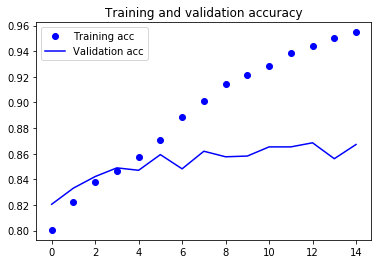

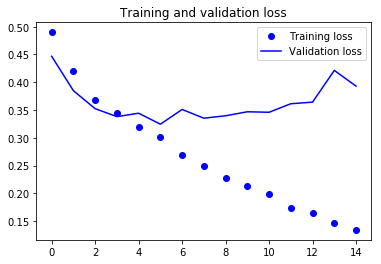

In [300]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

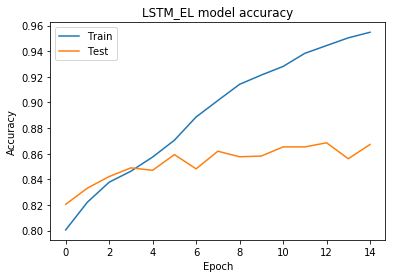

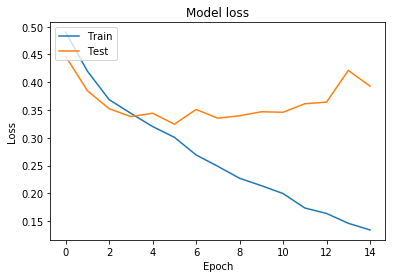

In [301]:
#plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('LSTM_EL model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [302]:
#kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
#results = cross_val_score(history, X_test, y_test, cv=kfold)
#print ("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [303]:
#textArray = np.array(pad_sequences(tokenizer.texts_to_sequences([input_x_220]), maxlen=maxlen))
#predicted = model.predict(textArray)[0]
#for i, prob in enumerate(predicted):
 #   if prob > 0.2:
  #      print(selected_categories[i])

In [304]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
#scores = model.evaluate(X_test, y_test, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

1181/1181 [==============================] - 5s 4ms/step
Accuracy: 87.13%


In [305]:
predict = model.predict(X_test)
#predict = model.predict(X_test)
print (predict)

[[1.96e-03 8.96e-03 4.39e-03 6.75e-04 9.85e-01]
 [5.28e-03 9.48e-01 1.91e-02 1.18e-02 2.00e-02]
 [9.90e-04 3.59e-03 9.96e-01 8.72e-04 8.93e-04]
 ...
 [8.92e-04 2.97e-03 9.97e-01 7.24e-04 6.99e-04]
 [9.84e-01 2.11e-03 1.34e-03 2.01e-03 1.94e-02]
 [2.44e-03 8.07e-03 5.24e-03 7.78e-04 9.84e-01]]


In [306]:
user_predict = model.predict(user_test)
#predict = model.predict(X_test)
print (user_predict)

[[8.71e-01 6.01e-03 2.38e-03 4.64e-02 5.79e-02]
 [1.99e-03 9.06e-03 4.65e-03 6.87e-04 9.84e-01]
 [3.94e-03 6.85e-02 1.60e-02 1.03e-03 9.06e-01]
 ...
 [1.66e-02 7.18e-01 7.23e-02 1.97e-01 1.16e-02]
 [1.46e-01 1.35e-01 1.52e-01 3.31e-01 1.17e-01]
 [1.03e-02 2.75e-02 8.71e-02 5.83e-03 8.76e-01]]


In [307]:
user_pred = [np.argmax(k, axis=None, out=None) for k in user_predict]
#pred = np.argmax(y_pred, axis=-1)
#print (user_pred)

In [308]:
followers_predict = model.predict(followers_test)
#predict = model.predict(X_test)
print (followers_predict)

[[0.61 0.03 0.06 0.03 0.29]
 [0.01 0.06 0.02 0.92 0.  ]
 [0.01 0.01 0.01 0.98 0.  ]
 ...
 [0.01 0.9  0.05 0.05 0.01]
 [0.   0.01 0.01 0.   0.98]
 [0.04 0.63 0.23 0.09 0.11]]


In [309]:
followers_pred = [np.argmax(k, axis=None, out=None) for k in followers_predict]
#pred = np.argmax(y_pred, axis=-1)
#print (followers_pred)

In [310]:
following_predict = model.predict(following_test)
#predict = model.predict(X_test)
print (following_predict)

[[0.69 0.02 0.01 0.2  0.08]
 [0.01 0.01 0.01 0.98 0.  ]
 [0.01 0.04 0.02 0.94 0.  ]
 ...
 [0.01 0.01 0.01 0.96 0.  ]
 [0.07 0.28 0.25 0.06 0.33]
 [0.02 0.82 0.08 0.11 0.01]]


In [311]:
following_pred = [np.argmax(k, axis=None, out=None) for k in following_predict]
#pred = np.argmax(y_pred, axis=-1)
#print (following_pred)

In [312]:
ueval_predict = model.predict(user_eval)

In [313]:
ueval_pred = [np.argmax(k, axis=None, out=None) for k in ueval_predict]

In [314]:
fgeval_predict = model.predict(following_eval)

In [315]:
fgeval_pred = [np.argmax(k, axis=None, out=None) for k in fgeval_predict]

In [316]:
freval_predict = model.predict(follower_eval)

In [317]:
freval_pred = [np.argmax(k, axis=None, out=None) for k in freval_predict]

In [318]:
user = zip(u_list, u_tweets, user_pred)
with open('new_user.csv', 'w', newline='') as output_file:
    writer = csv.writer(output_file)
    writer.writerow(["user","tweets","labels"])
    for row in user:
        writer.writerow(row)
    #writer.writerow(["user","tweets","labels"])
    #csv.writer(user, delimeter=";")

#data = {"User": user_csv['user'], "tweets": user_csv['tweets'], "labels": user_pred}
#user.append(data)
#keys = user[0].keys()
#with open('new_user.csv', 'w', newline='') as output_file:
 #   dict_writer = csv.DictWriter(output_file, keys)
  #  dict_writer.writeheader()
   # dict_writer.writerows(user)   

In [319]:
followers =  zip(fwr_list, fwr_tweets, followers_pred, fwr_follows)
with open('new_followers.csv', 'w', newline='') as output_file:
    writer = csv.writer(output_file)
    writer.writerow(["user","tweets","labels", "follows"])
    for row in followers:
        writer.writerow(row)


#data_fwr = {"User": followers_csv['user'], "tweets": followers_csv['tweets'], "labels": followers_pred, "follows": followers_csv['follows']}
#followers.append(data_fwr)
#keys = followers[0].keys()
#with open('new_followers.csv', 'w', newline='') as output_file:
    #dict_writer = csv.DictWriter(output_file, keys)
    #dict_writer.writeheader()
    #dict_writer.writerows(followers)   

In [320]:
following = zip(fwg_list, fwg_tweets, following_pred, fwg_follows)
with open('new_following.csv', 'w', newline='') as output_file:
    writer = csv.writer(output_file)
    writer.writerow(["user","tweets","labels", "follows"])
    for row in following:
        writer.writerow(row)

#data_fwg = {"User": follows_csv['user'], "tweets": follows_csv['tweets'], "labels": following_pred, "follows": follows_csv['follows']}
#following.append(data_fwg)
#keys = following[0].keys()
#with open('new_following.csv', 'w', newline='') as output_file:
    #dict_writer = csv.DictWriter(output_file, keys)
    #dict_writer.writeheader()
    #dict_writer.writerows(following)   

In [321]:
uTe = zip(uT_list, uT_tweets, ueval_pred)
with open('eval_user.csv', 'w', newline='') as output_file:
    writer = csv.writer(output_file)
    writer.writerow(["user","tweets","labels"])
    for row in uTe:
        writer.writerow(row)


In [322]:
fgTe = zip(fg_list, fg_tweets, fgeval_pred, fg_follows)
with open('eval_following.csv', 'w', newline='') as output_file:
    writer = csv.writer(output_file)
    writer.writerow(["user","tweets","labels", "follows"])
    for row in fgTe:
        writer.writerow(row)


In [323]:
frTe = zip(fr_list, fr_tweets, freval_pred, fr_follows)
with open('eval_follower.csv', 'w', newline='') as output_file:
    writer = csv.writer(output_file)
    writer.writerow(["user","tweets","labels", "follows"])
    for row in frTe:
        writer.writerow(row)


In [324]:
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]
#print (y_classes)

In [325]:
pred = [np.argmax(k, axis=None, out=None) for k in predict]
#pred = np.argmax(y_pred, axis=-1)
#print (pred)

In [326]:
from sklearn.metrics import classification_report
print(classification_report(y_classes, pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       226
           1       0.47      0.59      0.52       232
           2       0.91      0.82      0.86       257
           3       0.61      0.50      0.55       230
           4       0.67      0.66      0.66       236

   micro avg       0.67      0.67      0.67      1181
   macro avg       0.68      0.67      0.67      1181
weighted avg       0.68      0.67      0.67      1181



In [327]:
#kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
#results = cross_val_score(kfold, X_test, y_test)
#print ("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [328]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test, predict))

In [329]:
#PLOT CONFUSION MATRIX
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

Normalized confusion matrix
[[0.76 0.08 0.   0.14 0.02]
 [0.03 0.59 0.04 0.1  0.22]
 [0.03 0.07 0.82 0.03 0.04]
 [0.12 0.32 0.01 0.5  0.04]
 [0.07 0.2  0.03 0.03 0.66]]


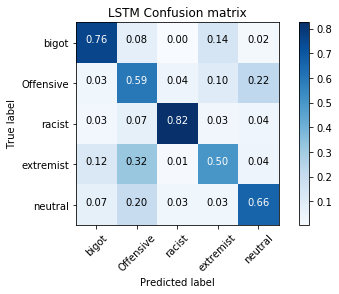

In [330]:

class_names = ['bigot','Offensive','racist', 'extremist', 'neutral']

lstm_matrix = confusion_matrix(y_classes, pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(lstm_matrix, classes=class_names, normalize=True, title='LSTM Confusion matrix')

plt.show()